Importamos las librerías básicas

In [1]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from textblob import TextBlob

usamos pandas para leer el archivo y mostramos su encabezado

In [4]:
df = pd.read_excel('eval_docente_comentarios.xlsx')
df.head()

/home/alejandrodaza/.local/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Obs ID,Form ID,Obs Identificacion Evaluador,Obs Identificacion Evaluado,Obs Anio,Obs Periodo,Obs Carrera,Obs Asignatura,Obs Fec Registro,Obs Observaciones,Obs Estado,Obs Grupo
0,1289740,4821,20202605005,41682394,2022,3,605,60505002,2022-11-30,Sería importante para el proceso de investigac...,A,605-1
1,1289741,4821,20221267014,79378648,2022,3,267,26702003,2022-11-30,no contamos con sede de postgrados aun,A,267-1
2,1289742,4821,20221267014,52877419,2022,3,267,26702004,2022-11-30,Tuvimos dificultad con el tema audiovisual en ...,A,267-1
3,1289743,4821,20221267014,41641936,2022,3,267,26702002,2022-11-30,Fue muy oportuna la actividad de ejecicios t...,A,267-1
4,1289744,4821,20221267014,80067185,2022,3,267,26702001,2022-11-30,"Excelente manejo del tema, me gusto la activi...",A,267-1


Traemos de nltk el set de stopwords para eliminarlas de las respuestas

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alejandrodaza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creamos la función para eliminar stopwords

In [6]:
def eliminar_stopwords(texto, stopwords):
    return ' '.join([word for word in texto.split(' ') if word not in stopwords])

In [7]:
df['observacion'] = df['Obs Observaciones'].map(lambda x: eliminar_stopwords(str(x), stopwords))

Sacamos los valores de polaridad usando TextBlob para las observaciones

In [8]:
df['polaridad'] = df['observacion'].map(lambda x: TextBlob(x).sentiment.polarity)

Creamos la función de analisis sobre polaridad

In [9]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
df['ap'] = df['polaridad'].map(lambda x: getAnalysis(x))

In [11]:
df['ap'].value_counts()

Neutral     62229
Positive     3071
Negative      655
Name: ap, dtype: int64

Generamos la nube de palabras

In [12]:
df_group_facultades = df.groupby('Obs Carrera')


In [28]:
df_group_facultades.head(10)

,Obs ID,Form ID,Obs Identificacion Evaluador,Obs Identificacion Evaluado,Obs Anio,Obs Periodo,Obs Carrera,Obs Asignatura,Obs Fec Registro,Obs Observaciones,Obs Estado,Obs Grupo,observacion,polaridad,ap
0,1289740,4821,20202605005,41682394,2022,3,605,60505002,2022-11-30,Sería importante para el proceso de investigac...,A,605-1,Sería importante proceso investigación conocer...,0.0,Neutral
1,1289741,4821,20221267014,79378648,2022,3,267,26702003,2022-11-30,no contamos con sede de postgrados aun,A,267-1,contamos sede postgrados aun,0.0,Neutral
2,1289742,4821,20221267014,52877419,2022,3,267,26702004,2022-11-30,Tuvimos dificultad con el tema audiovisual en ...,A,267-1,Tuvimos dificultad tema audiovisual espacio as...,0.0,Neutral
3,1289743,4821,20221267014,41641936,2022,3,267,26702002,2022-11-30,Fue muy oportuna la actividad de ejecicios t...,A,267-1,Fue oportuna actividad ejecicios teerapeutic...,0.0,Neutral
4,1289744,4821,20221267014,80067185,2022,3,267,26702001,2022-11-30,"Excelente manejo del tema, me gusto la activi...",A,267-1,"Excelente manejo tema, gusto actividad dos ma...",0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64279,1414198,5704,80142907,80142907,2023,3,133,0,2023-11-02,N.A,A,0,N.A,0.0,Neutral
64977,1417327,5526,20171772009,19296014,2023,3,772,19736,2023-11-03,Observación ninguna\r\nMe parece que tiene un ...,A,574-282,Observación ninguna\r\nMe parece excelente dom...,0.0,Neutral
64981,1417335,5526,20171772009,11187193,2023,3,772,11117,2023-11-03,Excelente dominio del tema.,A,572-221,Excelente dominio tema.,0.0,Neutral
64983,1417338,5526,20171772009,79966414,2023,3,772,11116,2023-11-03,Excelente dominio del tema.,A,572-221,Excelente dominio tema.,0.0,Neutral


In [13]:
txts = ' '.join(df['observacion'])
wc = WordCloud(width=300, background_color="white").generate(txts)

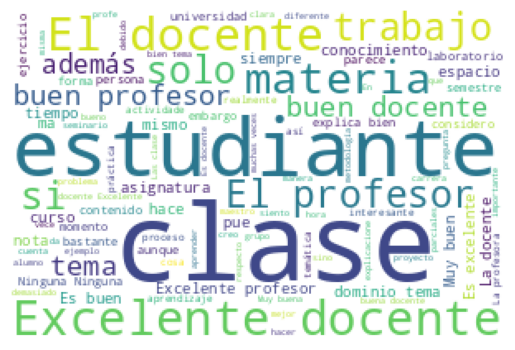

In [14]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')
plt.show()